# ⚽ Day 4 — Player Stats Dashboard (Rehan Style)

_“Code goofy, clean data. - Rehan”_  

---

## Step 0 — Import & Create Raw Data

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
#this shows plots in the notebook
%matplotlib inline 

# raw player table df1(data frame 1)
players = pd.DataFrame({
    'Player':  ['Cristiano', 'Messi', 'Neymar', 'Mbappe', 'Haaland'],
    'Club':    ['Al Nassr', 'Inter Miami', 'Al Hilal', 'PSG', 'Man City'],
    'Goals':   [820, 810, 400, 270, 180],
    'Assists': [230, 300, 180, 100, 50],
    'Country': ['Portugal', 'Argentina', 'Brazil', 'France', 'Norway'],
    'Salary':  [200, 190, None, 130, 150]
})

# club → league lookup (data frame 2)
leagues = pd.DataFrame({
    'Club':   ['Al Nassr', 'Inter Miami', 'Al Hilal', 'PSG', 'Man City'],
    'League': ['Saudi Pro League', 'MLS', 'Saudi Pro League', 'Ligue 1', 'Premier League']
})

## Step 1 — Merge the Two Tables (left join on **Club**)

In [60]:
merged = pd.merge(players, leagues, on='Club', how='left')
merged

,Player,Club,Goals,Assists,Country,Salary,League
0,Cristiano,Al Nassr,820,230,Portugal,200.0,Saudi Pro League
1,Messi,Inter Miami,810,300,Argentina,190.0,MLS
2,Neymar,Al Hilal,400,180,Brazil,NaN,Saudi Pro League
3,Mbappe,PSG,270,100,France,130.0,Ligue 1
4,Haaland,Man City,180,50,Norway,150.0,Premier League


## Step 2 — Handle Missing Values

In [61]:
# Fill missing salary with mean salary
# found out this doesnt work on pandas from version 3.0 --> merged['Salary'].fillna(merged['Salary'].mean(), inplace=True)
merged['Salary'] = merged['Salary'].fillna(merged['Salary'].mean())
# Safety net: turn any leftover NaNs to 0
merged.fillna(0, inplace=True)

merged

,Player,Club,Goals,Assists,Country,Salary,League
0,Cristiano,Al Nassr,820,230,Portugal,200.0,Saudi Pro League
1,Messi,Inter Miami,810,300,Argentina,190.0,MLS
2,Neymar,Al Hilal,400,180,Brazil,167.5,Saudi Pro League
3,Mbappe,PSG,270,100,France,130.0,Ligue 1
4,Haaland,Man City,180,50,Norway,150.0,Premier League


## Step 3 — Add a **Tier** Column (Legend / Star / Rising)

In [62]:
merged['Tier'] = merged['Goals'].apply(
    lambda x: 'Legend' if x >= 700 else ('Star' if x >= 300 else 'Rising')
)
merged[['Player', 'Goals', 'Tier']]

,Player,Goals,Tier
0,Cristiano,820,Legend
1,Messi,810,Legend
2,Neymar,400,Star
3,Mbappe,270,Rising
4,Haaland,180,Rising


## Step 4 — League‑Level Summary (GroupBy + Agg)

In [63]:
league_stats = (
    merged.groupby('League').agg(
        AvgSalary   = ('Salary', 'mean'),
        TotalGoals  = ('Goals', 'sum'),
        TotalAssists= ('Assists', 'sum'),
        Players     = ('Player', 'count')
).round(2).sort_values('AvgSalary', ascending=False)
)

league_stats

,AvgSalary,TotalGoals,TotalAssists,Players
League,,,,
MLS,190.00,810,300,1
Saudi Pro League,183.75,1220,410,2
Premier League,150.00,180,50,1
Ligue 1,130.00,270,100,1


## Step 5 — Quick Visual: **Total Goals per League**

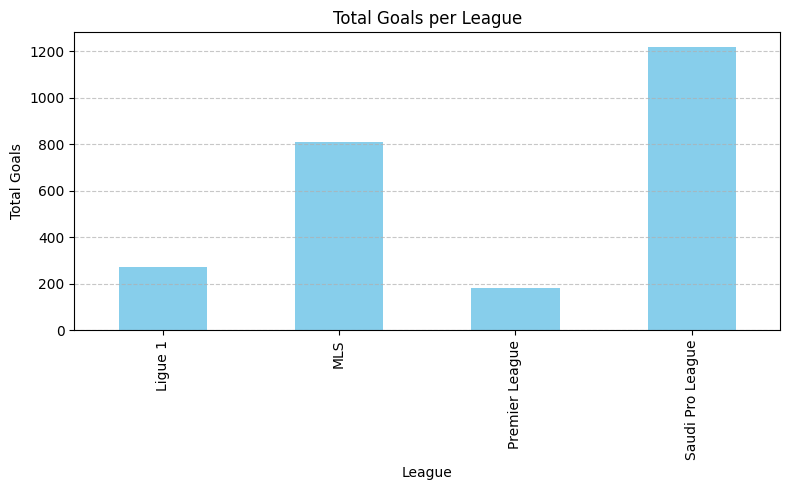

In [64]:
league_goals = merged.groupby('League')['Goals'].sum()

league_goals.plot(
    kind='bar',
    figsize=(8,5),
    color='skyblue', #blue is a nice colour!
    title='Total Goals per League'
)
plt.xlabel('League')
plt.ylabel('Total Goals')
plt.grid(axis='y', linestyle='--', alpha=0.7) #alpha is transperency 
plt.tight_layout()
plt.show()

## Step 6 — Who Contributes the Most? (Goals + Assists)

In [65]:
merged['Total_Contribution'] = merged['Goals'] + merged['Assists']
top3 = merged.sort_values('Total_Contribution', ascending=False).head(3)
top3[['Player', 'Total_Contribution', 'Tier']]

,Player,Total_Contribution,Tier
1,Messi,1110,Legend
0,Cristiano,1050,Legend
2,Neymar,580,Star


## Step 7 — Final Clean‑Up & Stats

In [66]:
# Drop Country (not needed)
merged.drop('Country', axis=1, inplace=True,errors='ignore')

In [67]:
# Index dance: set & reset to show you can
merged.set_index('Player', inplace=True)
merged.reset_index(inplace=True)

In [68]:
# Summary stats (2 decimals)
merged.describe().round(2)

,Goals,Assists,Salary,Total_Contribution
count,5.00,5.00,5.00,5.00
mean,496.00,172.00,167.50,668.00
std,301.55,99.85,28.61,396.76
min,180.00,50.00,130.00,230.00
25%,270.00,100.00,150.00,370.00
50%,400.00,180.00,167.50,580.00
75%,810.00,230.00,190.00,1050.00
max,820.00,300.00,200.00,1110.00


### 🏁 **End of Day 4 Notebook**

- Merged two tables  
- Cleaned missing values  
- Added tiers via `.apply()`  
- Grouped & aggregated per league  
- First matplotlib visual completed 🔥
- I coded it now I own it.